In [1]:
# 필요한 library import

import os
import json
from tqdm import tqdm
from glob import glob
import pandas as pd
import numpy as np

In [2]:
# 제출파일 형식에 맞는 dataframe 형태
results = {
    'file_name':[], 'box_id':[], 'class_id':[], 'confidence':[], 'point1_x':[], 'point1_y':[],
    'point2_x':[], 'point2_y':[], 'point3_x':[], 'point3_y':[], 'point4_x':[], 'point4_y':[]
}

# inference를 통해 얻은 json file 지정
test_file = "/home/minyong/bb-detection/mmdetection/work_dirs/baseline_deformable-detr-aug/baseline_deformable-detr-aug(39epoch).bbox.json"

with open(test_file, "rb") as f:
    result_data = json.load(f)
   
for box_index, result in enumerate(tqdm(result_data)):
    file_name = f"test_{result['image_id']}.json"

    x_min, y_min, w, h = result["bbox"]
    x_max, y_max = x_min + w, y_min + h

    results['file_name'].append(file_name)
    results['box_id'].append(box_index)
    results['class_id'].append(result["category_id"])
    results['confidence'].append(result["score"])
    results['point1_x'].append(x_min)
    results['point1_y'].append(y_min)
    results['point2_x'].append(x_max)
    results['point2_y'].append(y_min)
    results['point3_x'].append(x_max)
    results['point3_y'].append(y_max)
    results['point4_x'].append(x_min)
    results['point4_y'].append(y_max)

100%|██████████| 115382/115382 [00:00<00:00, 832534.28it/s]


In [3]:
submission = pd.DataFrame(results)
submission.shape

(115382, 12)

In [4]:
submission.head(10)

,file_name,box_id,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,test_205471.json,0,1,0.763423,403.668884,282.490509,535.902100,282.490509,535.902100,409.575745,403.668884,409.575745
1,test_205471.json,1,1,0.404796,327.164459,191.639130,532.183105,191.639130,532.183105,393.733002,327.164459,393.733002
2,test_205471.json,2,1,0.226453,434.099426,296.040344,525.604004,296.040344,525.604004,380.245026,434.099426,380.245026
3,test_205471.json,3,1,0.139828,328.132538,209.898300,375.308655,209.898300,375.308655,264.731995,328.132538,264.731995
4,test_205471.json,4,1,0.076524,418.858673,311.570038,503.730591,311.570038,503.730591,402.286285,418.858673,402.286285
5,test_205471.json,5,2,0.089091,382.738983,279.103912,533.796082,279.103912,533.796082,420.284210,382.738983,420.284210
6,test_220419.json,6,3,0.984603,213.206146,422.953003,264.213776,422.953003,264.213776,498.861938,213.206146,498.861938
7,test_220419.json,7,3,0.090027,279.305450,245.487396,352.833008,245.487396,352.833008,305.038696,279.305450,305.038696
8,test_200362.json,8,1,0.731154,348.287109,321.730835,467.815460,321.730835,467.815460,433.012787,348.287109,433.012787
9,test_200362.json,9,1,0.618199,154.122955,201.625977,239.711746,201.625977,239.711746,290.819580,154.122955,290.819580


<AxesSubplot:ylabel='Frequency'>

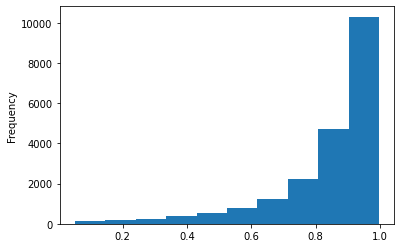

In [5]:
# 각 image에서 confidence score가 가장 높은 것 하나씩 추출
base_submission = submission.loc[list(submission.confidence.groupby(submission.file_name).idxmax()), :]
base_submission
base_submission.confidence.plot.hist()

In [6]:
submission_sorted = submission.sort_values("confidence", ascending=False)
submission_sorted

,file_name,box_id,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
39317,test_207206.json,39317,2,0.997348,280.997253,23.260775,542.202637,23.260775,542.202637,547.050903,280.997253,547.050903
24514,test_219973.json,24514,2,0.997289,222.797699,74.273743,542.030151,74.273743,542.030151,422.177429,222.797699,422.177429
48678,test_208628.json,48678,2,0.997262,263.066345,20.453712,544.685730,20.453712,544.685730,514.913879,263.066345,514.913879
23701,test_215482.json,23701,2,0.996960,299.702576,31.225258,546.910095,31.225258,546.910095,538.753052,299.702576,538.753052
10388,test_215560.json,10388,2,0.996935,218.137817,101.753967,315.198853,101.753967,315.198853,299.717346,218.137817,299.717346
...,...,...,...,...,...,...,...,...,...,...,...,...
32561,test_211141.json,32561,1,0.050004,238.987946,42.818565,442.113708,42.818565,442.113708,176.048355,238.987946,176.048355
102935,test_219490.json,102935,4,0.050002,278.679840,214.150696,358.683502,214.150696,358.683502,301.449524,278.679840,301.449524
86021,test_214694.json,86021,1,0.050001,103.987869,397.569366,316.541473,397.569366,316.541473,542.148132,103.987869,542.148132
79202,test_220680.json,79202,1,0.050001,88.373428,225.202621,332.299042,225.202621,332.299042,465.205719,88.373428,465.205719


In [7]:
box_count = {index: 1 for index in base_submission.file_name.unique()}

for index in tqdm(range(submission_sorted.shape[0])):
    file_name, box_id, class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y = submission_sorted.iloc[index, :]
    
    if (box_count[file_name] < 2) and (box_id not in base_submission.box_id.unique()):
        box_count[file_name] += 1
        new_row = pd.DataFrame([{
            "file_name": file_name,
            "box_id": box_id,
            "class_id": class_id,
            "confidence": confidence,
            "point1_x": point1_x,
            "point1_y": point1_y,
            "point2_x": point2_x,
            "point2_y": point2_y,
            "point3_x": point3_x,
            "point3_y": point3_y,
            "point4_x": point4_x,
            "point4_y": point4_y
        }])
        base_submission = pd.concat([base_submission, new_row])

    if base_submission.shape[0] >= 30000:
        break


 25%|██▍       | 28613/115382 [00:22<01:08, 1263.06it/s]


In [8]:
base_submission.shape

(30000, 12)

In [10]:
base_submission.drop(['box_id'], axis=1, inplace=True)

In [12]:
base_submission.to_csv('mmdedtection_baseline_least1.csv', index=False)